# Cesty a soubory s Pathlib

Základní práci se soubory – čtení z nich a psaní do nich – rozebírá [lekce o souborech](../../beginners/files/).
Pro zopakování:

In [1]:
# Otevření textového souboru "pathlib.ipynb" pro čtení
with open('pathlib.ipynb', encoding='utf-8') as file:
    # Přečtení obsahu
    contents = file.read()

# Velikost souboru
print(len(contents))

70069


Jméno souboru, případně cesta k němu, se tradičně zadává jako řetězec.
Jednotlivé adresáře jsou odděleny lomítkem (případně na Windows zpětným lomítkem); fungují tu absolutní i relativní cesty.

Pro prosté otvírání známých souborů to stačí.
Když ale potřebujeme s cestami k souborům pracovat víc, řetězce jsou docela nepohodlné, a navíc je problém pamatovat na všechny různé případy, které můžou nastat.

Zkusím pro příkad:
* získat příponu souboru, a
* rozdělit cestu na jednotlivé adresáře.

Na mém Linuxovém počítači cesty vypadají jako `/home/janca/Documents/archiv.tar.gz`, takže bych mohl napsat něco jako:

In [2]:
def get_components(path):
    """Vrátí seznam komponentů cesty (jednotlivých adresářů/souborů)"""
    return path.split('/')

def get_extension(path):
    """Vrátí příponu souboru"""
    parts = path.split('.')
    return parts[-1]

Pro mou cestu to funguje:

In [3]:
str_path = '/home/janca/Documents/archiv.tar.gz'

print('Components:', get_components(str_path))
print('Suffix:', get_extension(str_path))

Components: ['', 'home', 'janca', 'Documents', 'archiv.tar.gz']
Suffix: gz


Ale pro jinou cestu na jiném počítači už ne:

In [4]:
str_path = 'C:\\Users\\Jana\\Programy\\superprojekt\\README'

print('Components:', get_components(str_path))
print('Suffix:', get_extension(str_path))

Components: ['C:\\Users\\Jana\\Programy\\superprojekt\\README']
Suffix: C:\Users\Jana\Programy\superprojekt\README


To, že programátoři používali na cesty řetězce a nepromýšleli všechny možné podivnosti souborových systémů, je hlavní důvod proč si ještě dnes spousta programů neporadí s diakritikou nebo mezerami v názvech souborů.

Jde to líp? Samozřejmě!

## Importujeme pathlib

Od verze 3.4 obsahuje Python knihovnu `pathlib`, jejíž třída `Path` reprezentuje cestu k souboru a umožňuje takové cesty jednoduše manipulovat.


In [5]:
from pathlib import Path

# Tahle cesta na Windows i Unixu funguje podobě
path = Path('/home/janca/Documents/archiv.tar.gz')
print('Components:', path.parts)
print('Suffix:', path.suffix)

Components: ('/', 'home', 'janca', 'Documents', 'archiv.tar.gz')
Suffix: .gz


In [6]:
# Druhý příklad je cesta pro Windows
# (i když program spustím na Linuxu, kde normální `Path` nezná zpětná lomítka)
from pathlib import PureWindowsPath

winpath = PureWindowsPath('C:\\Users\\Jana\\Programy\\superprojekt\\README')
print('Components:', winpath.parts)
print('Suffix:', winpath.suffix)

Components: ('C:\\', 'Users', 'Jana', 'Programy', 'superprojekt', 'README')
Suffix: 


My si teď projdeme většinu z toho, co `pathlib` umožňuje. Není potřeba si to všechno hned pamatovat: knihovna má [obsáhlou dokumentaci](https://docs.python.org/3/library/pathlib.html) a výběr z ní je i [na taháku].

Cesty v pathlib se tvoří zavoláním třídy `Path`. Na Windows se tím vytvoří `WindowsPath`, na Unixu `PosixPath`.

Obě považují dopředná lomítka za oddělovač adresářů, takže následující bude fungovat na všech systémech:

In [7]:
docs_path = Path('/home/janca/Documents')
docs_path

PosixPath('/home/janca/Documents')

Už při vytvoření cesty se tato *normalizuje*, zjednoduší bez změny významu.
Víc lomítek za sebou se spojí do jednoho, zbytečné adresáře `.` nebo lomítka na konci se vynechají.

In [8]:
Path('/tmp//foo/./bar/')

PosixPath('/tmp/foo/bar')

Když chci k takové cestě něco připojit, použiju operátor `/` (který by se měl používat na dělení, ale psst!):

In [9]:
docs_path / 'archiv.tar.gz'

PosixPath('/home/janca/Documents/archiv.tar.gz')

Přidávat se takhle dají řetězcové cesty, nebo i další `Path`:

In [10]:
Path('/') / 'home/janca' / Path('archiv.tar.gz')

PosixPath('/home/janca/archiv.tar.gz')

Pozor ale na to, že *absolutní* cesta (s lomítkem nebo jménem disku na začátku) znamená, že procházení začíná znovu od kořenového adresáře. Když k něčemu připojím absolutní cestu, předchozí cesta se zahodí.

In [11]:
Path('/home/janca') / '/tmp/foo'

PosixPath('/tmp/foo')

Občas lomítko není pohodlné. V takových případech jde použít metoda `joinpath` , která má stejný efekt:

In [12]:
Path('/').joinpath('home', 'janca/archiv.tar.gz')

PosixPath('/home/janca/archiv.tar.gz')

Cesty v pathlib mají spoustu užitečných atributů:

In [13]:
# Příklady ukážeme opět na téhle cestě:
path = Path('/home/janca/Documents/archiv.tar.gz')
path

PosixPath('/home/janca/Documents/archiv.tar.gz')

In [14]:
# jméno
path.name

'archiv.tar.gz'

In [15]:
# Přípona (poslední)
path.suffix

'.gz'

In [16]:
# Věchny přípony
path.suffixes

['.tar', '.gz']

In [17]:
# "kořen" jména (bez poslední přípony)
path.stem

'archiv.tar'

In [18]:
# "rodič" – adresář, který tuto cestu obsahuje
path.parent

PosixPath('/home/janca/Documents')

In [19]:
path.parent.parent

PosixPath('/home/janca')

In [20]:
path.parent.parent.parent.parent

PosixPath('/')

In [21]:
# Všechny "předky" -- rodiče, prarodiče, atd. -- nabízí atribut "parents"
path.parents

<PosixPath.parents>

In [22]:
# Výsledek je ale "iterátor"; aby se ukázaly jednotlivé hodnoty,
# je potřeba ho projít cyklem `for`, převést na seznam, atp.
list(path.parents)

[PosixPath('/home/janca/Documents'),
 PosixPath('/home/janca'),
 PosixPath('/home'),
 PosixPath('/')]

In [23]:
# Je cesta absolutní?
path.is_absolute()

True

In [24]:
Path('foo/archiv.zip').is_absolute()

False

In [25]:
# Jaká by bylaRelativní vzhledem k jiné, nadřazené cestě
relative = path.relative_to('/home/janca')
relative

PosixPath('Documents/archiv.tar.gz')

In [26]:
# Spojením té nadřazené cesty a této relativní dostanu zpátky původní cestu
Path('/home/janca') / relative

PosixPath('/home/janca/Documents/archiv.tar.gz')

In [27]:
# Přepsání jména souboru (poslední části cesty)
path.with_name('hrad.jpeg')

PosixPath('/home/janca/Documents/hrad.jpeg')

In [28]:
# Přepsání koncovky
path.with_suffix('.bz2')

PosixPath('/home/janca/Documents/archiv.tar.bz2')

In [29]:
# Pokud existující koncovka není, `with_suffix` ji přidá
Path('myproject/README').with_suffix('.xz')

PosixPath('myproject/README.xz')

## Speciální cesty

Všechno uvedené výše jsou čistě „textové“ operace – pracovali jsme jen se *jmény*.
Žádné z použitých adresářů nebo souborů nemusíš na počítači mít, aby to fungovalo – vlastně nepotřebuješ ani počítač se souborovým systémem. (Jen se ti na něm musí povést naimportovat `pathlib`.)

Dokonce si můžeš vyzkoušet, jak by to fungovalo na jiném systému – místo `Path` naimportuj a použij `PureWindowsPath` nebo `PurePosixPath`, které reprezentují Windosové, resp. Unixové cesty.

Teď se ale dostaneme k operacím, na které je potřeba mít přístup k souborovému systému. „`Pure`“ cesty už nebudou fungovat.

Nejdříve pár základních adresářů:

In [30]:
# Aktuální adresář
Path.cwd()

PosixPath('/home/pviktori/pyladies/barvy')

In [31]:
# Můj domovský adresář
Path.home()

PosixPath('/home/pviktori')

A základní otázku:

In [32]:
# Existuje na té ukázkové cestě nějaký soubor?
path.exists()

False

In [33]:
# Hmmm... A existuje můj domovský adresář?
Path.home().exists()

True

In [34]:
# A je to vůbec adresář?
Path.home().is_dir()

True

In [35]:
# Je to normální datový soubor?
Path.home().is_file()

False

Abychom měli všichni stejné podmínky,
stáhni si na další experimenty [archiv s testovacími soubory](static/archiv.tar.gz).
Dej si ho do aktuálního adresáře (`Path.cwd()`), a pak ho následujícím kouskem kódu rozbal:


In [36]:
import tarfile

path = Path("archiv.tar.gz")
if not path.exists():
    # (z technických důvodů je i druhé
    # možné umístění archivu)
    path = Path("static/archiv.tar.gz")

# Co je v archivu?
tarfile.open(path, 'r|gz').getnames()

['soubory',
 'soubory/hrad.jpeg',
 'soubory/hrad.attribution',
 'soubory/.gitignore',
 'soubory/kolecko.png',
 'soubory/texty',
 'soubory/texty/vodnik.txt',
 'soubory/texty/lidove',
 'soubory/texty/lidove/pes.txt',
 'soubory/texty/lidove/holka.txt',
 'soubory/texty/vladimir.txt',
 'soubory/texty/cizojazycne',
 'soubory/texty/cizojazycne/iroha.txt',
 'soubory/texty/cizojazycne/witch.txt',
 'soubory/hlad.txt',
 'soubory/hraz.attribution',
 'soubory/ententyky.txt',
 'soubory/hraz.jpeg',
 'soubory/README']

In [37]:
# Extrakce archivu. (Kdybys to zkoušel/a pro jiné archivy, vždy před
# rozbalením zkontroluj cesty všech souborů v archivu -- ať se rozbalením
# nepřepíše nějaký důležitý soubor!)
tarfile.open(path, 'r|gz').extractall()

Rozbalením archivu vznikl `./soubory/` (adresář `soubory` v aktuálním adresáři).
Pojďme se mu kouknout na zoubek:

In [38]:
base = Path('./soubory')
base

PosixPath('soubory')

In [39]:
print('Je to adresář?', base.is_dir())
print('Je to normální soubor?', base.is_file())

Je to adresář? True
Je to normální soubor? False


Podle informací o archivu je v `soubory` nějaký `ententyky.txt` – podle přípony soubor s textem.

In [40]:
ententyky = base / 'ententyky.txt'
print('Je to adresář?', ententyky.is_dir())
print('Je to normální soubor?', ententyky.is_file())

Je to adresář? False
Je to normální soubor? True


Objekty `Path` lze používat v naprosté většině situací, kdy jde použít cesta jako řetězec. Například pro funkci `open`:

In [41]:
with open(ententyky, encoding='utf-8') as file:
    print(file.read())

Ententýky, dva špalíky,
čert vyletěl z elektriky.

Bez kloubouku, bos,
natloukl si nos.

Byla boule veliká
jako celá Afrika.



`Path` ale má `open` in jako metodu:

In [42]:
with ententyky.open(encoding='utf-8') as file:
    print(file.read())

Ententýky, dva špalíky,
čert vyletěl z elektriky.

Bez kloubouku, bos,
natloukl si nos.

Byla boule veliká
jako celá Afrika.



A protože je čtení celého textového obsahu souboru docela užitečné, existuje i zkratka, která soubor otevře, přečte a zavře najednou:

In [43]:
print(ententyky.read_text())

Ententýky, dva špalíky,
čert vyletěl z elektriky.

Bez kloubouku, bos,
natloukl si nos.

Byla boule veliká
jako celá Afrika.



(Větší soubory je ale lepší otevřít ve `with` a zpracovávat třeba po řádcích, aby se obsah nemusel do paměti počítače načíst celý najednou.)

Existuje i `write_text`:

In [44]:
(Path.cwd() / 'pisnicka.txt').write_text('Holka modrooká\nNesedávej u potoka!')

34

Kolem `(Path.cwd() / 'pisnicka.txt')` jsou potřeba závorky, jinak by Python hledal metodu `write_text` na řetězci `'pisnicka.txt'` – a nenašel by ji. V takových případech je úhlednější použít místo lomítka `joinpath`.

In [45]:
text = Path.cwd().joinpath('pisnicka.txt').read_text()
print(text)

Holka modrooká
Nesedávej u potoka!


## Zpátky na <s>stromy</s> řetězce

Ve většině případů jde `Path` použít tam, kde se cesta dá zadat jako řetězec. Na ale vždy – `pathlib` existuje teprve od roku 2014, a některé Pythonní knihovny stále ještě vyžadují řetězce.

Jedna z výjimek je `IPython.display.Image`, která umí v Notebooku vykreslit obrázek.

In [46]:
from IPython.display import Image

`Image` potřebuje (aspoň začátkem roku 2018) řetězcovou cestu. Příkaz `Image(base / 'hrad.jpeg')` mi skončil chybou typu – `TypeError: a bytes-like object is required, not 'PosixPath'`.

V takových případech ale stačí `Path` převést na řetězec.

In [47]:
str(base / 'hrad.jpeg')

'soubory/hrad.jpeg'

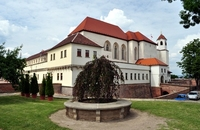

In [48]:
Image(str(base / 'hrad.jpeg'))

In [49]:
# Informace o autorství obrázku (díky, Millenium187!)
print(base.joinpath('hrad.attribution').read_text())

"hrad.jpg" is (c) 2011, Wikipedia user Millenium187
    https://commons.wikimedia.org/wiki/User:Millenium187
Here used under the Creative Commons Attribution-Share Alike 3.0 Unported license.

See: https://commons.wikimedia.org/wiki/File:Hrad_%C5%A0pilberk_II.jpg




## A co adresáře?

I s adresáři umí `pathlib` pracovat.
Nejzákladnější operace je získání cest k obsaženým souborům:

In [50]:
base.iterdir()

<generator object Path.iterdir at 0x7fbd4443b9e8>

Metoda `iterdir` vrací iterátor – objekt, přes který musíme „projít“, abychom z něj dostali obsah.
Projít se dá cyklem `for`, převedením na seznam a podobnými operacemi.

In [51]:
list(base.iterdir())

[PosixPath('soubory/hrad.jpeg'),
 PosixPath('soubory/hrad.attribution'),
 PosixPath('soubory/.gitignore'),
 PosixPath('soubory/kolecko.png'),
 PosixPath('soubory/texty'),
 PosixPath('soubory/hlad.txt'),
 PosixPath('soubory/hraz.attribution'),
 PosixPath('soubory/ententyky.txt'),
 PosixPath('soubory/hraz.jpeg'),
 PosixPath('soubory/README')]

In [52]:
for child in base.iterdir():
    print(child)

soubory/hrad.jpeg
soubory/hrad.attribution
soubory/.gitignore
soubory/kolecko.png
soubory/texty
soubory/hlad.txt
soubory/hraz.attribution
soubory/ententyky.txt
soubory/hraz.jpeg
soubory/README


Zajímavější operace je ale `glob`, která vyfiltruje soubory, které odpovídají určité šabloně.

V šabloně můžeš použít `*`, které odpovídá 0 a více písmenům (v rámci jména jednoho souboru):

In [53]:
# Soubory končící na ".txt"
list(base.glob('*.txt'))

[PosixPath('soubory/hlad.txt'), PosixPath('soubory/ententyky.txt')]

In [54]:
# Soubory, které mají ve jméně tečku
list(base.glob('*.*'))

[PosixPath('soubory/hrad.jpeg'),
 PosixPath('soubory/hrad.attribution'),
 PosixPath('soubory/.gitignore'),
 PosixPath('soubory/kolecko.png'),
 PosixPath('soubory/hlad.txt'),
 PosixPath('soubory/hraz.attribution'),
 PosixPath('soubory/ententyky.txt'),
 PosixPath('soubory/hraz.jpeg')]

… nebo `?`, což odpovídá jednomu písmenu:

In [55]:
# Slovo na čtyři, první je `h` a třetí `a`
list(base.glob('h?a?.*'))

[PosixPath('soubory/hrad.jpeg'),
 PosixPath('soubory/hrad.attribution'),
 PosixPath('soubory/hlad.txt'),
 PosixPath('soubory/hraz.attribution'),
 PosixPath('soubory/hraz.jpeg')]

Případně jde použít výčet písmen v hranatých závorkách, viz modul [fnmatch](https://docs.python.org/3/library/fnmatch.html).

In [56]:
list(base.glob('h?a[zd].????'))

[PosixPath('soubory/hrad.jpeg'), PosixPath('soubory/hraz.jpeg')]

In [57]:
list(base.glob('[!hv]*'))

[PosixPath('soubory/.gitignore'),
 PosixPath('soubory/kolecko.png'),
 PosixPath('soubory/texty'),
 PosixPath('soubory/ententyky.txt'),
 PosixPath('soubory/README')]

Poslední speciální kombinace je `**`. Dvě hvězdičky odpovídají základnímu adresáři a všem jeho podadresářům, pod-podadresářům, pod-pod-podadresářům atd.

In [58]:
list(base.glob('**'))

[PosixPath('soubory'),
 PosixPath('soubory/texty'),
 PosixPath('soubory/texty/lidove'),
 PosixPath('soubory/texty/cizojazycne')]

S pomocí `**` se často hledají soubory s danou příponou:

In [59]:
list(base.glob('**/*.txt'))

[PosixPath('soubory/hlad.txt'),
 PosixPath('soubory/ententyky.txt'),
 PosixPath('soubory/texty/vodnik.txt'),
 PosixPath('soubory/texty/vladimir.txt'),
 PosixPath('soubory/texty/lidove/pes.txt'),
 PosixPath('soubory/texty/lidove/holka.txt'),
 PosixPath('soubory/texty/cizojazycne/iroha.txt'),
 PosixPath('soubory/texty/cizojazycne/witch.txt')]

Víš co jsem vždycky chtěl?
Vzít řádky ze spousty textů a zamíchat je dohromady:

In [61]:
import random

lines = []

for txt_path in base.glob('**/*.txt'):
    with txt_path.open(encoding='utf-8') as file:
        lines.extend(file)

random.shuffle(lines)

for line in lines[:20]:
    print(line.strip())

Byla boule veliká

roznášeli domů.
Pejsku náš,
以呂波耳本部止

Zelené šaty, botky rudé,
co děláš,
čert vyletěl z elektriky.
zejtra moje svatba bude:
ať mi šije niť.

blaze, braši, tomu!
Bez kloubouku, bos,
Fire burn, and caldron bubble.
Holka modrooká,
natloukl si nos.
nevím sám,
Ententýky, dva špalíky,
千利奴流乎和加


Ale jsou i praktičtější využití – můžeš například zkusit nalézt všechny Pythonních moduly a zjistit z nich co importují.
Nebo projít všechny obrázky a zjistit, kolik celkem zabírají místa na disku.